In [53]:
!pip install scipy==1.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.9/30.9 MB 2.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.2
    Uninstalling scipy-1.6.2:
      Successfully uninstalled scipy-1.6.2


In [45]:
import os
from github import Github
from dotenv import load_dotenv
import networkx as nx
import csv
import numpy as np
#import plt
import matplotlib.pyplot as plt

#create an empty graph
G = nx.Graph()

In [46]:
# create nodes and edges between users and repositories
with open('dataset/users.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of repositories into an array of strings
        row[2:4] = [x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace('"', '').split(',') for x in row[2:4]]
        # Add the user node to graph with blue color
        G.add_node(row[0], name=row[1], repos=row[2], commits= row[3], color='#F8A643')

In [47]:
#create nodes and edges bewtween repositories and languages
with open('dataset/repos.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of languages into an array of strings
        row[2], row[5], row[6] = tuple(x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace('"', '').split(',') for x in (row[2], row[5], row [6]))
        
        G.add_node(row[0], name=row[1], topics=row[2], n_star=row[3], n_fork=row[4], languages=row[5], p_lang=row[6], color='#5D7EF5')

In [48]:
# Open the CSV file and read the data for languages
with open('dataset/languages.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # Add the language node to graph with green color
        G.add_node(row[0], language=row[1], color='#30FBD0')




In [49]:
#create edges between users, repositories and languages
for node in list(G.nodes):
    # if it's a user node
    if len(node) >= 1:
        if node[0] == "u":
            # for each repository in the user's list of repositories
            for repo in G.nodes[node]['repos']:
                # add an edge between the user and the repository
                G.add_edge(node, repo)
        if node[0] == "r":
            # for each language in the repository's list of languages
            for lang in G.nodes[node]['languages']:
                # add an edge between the repository and the language
                G.add_edge(node, lang)     

nx.info(G)

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_6274/4017047192.py:16: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 1499 nodes and 2369 edges'

In [51]:
#calculate the betweenness centrality of all nodes
betweenness = nx.betweenness_centrality(G, normalized=True)

#calculate the betweenness centrality of languages nodes
lang_btc = {k: v for k, v in betweenness.items() if k.startswith('l_')}

#print the betweenness centrality of firts 5 languages in descendig order
for node, centrality in sorted(lang_btc.items(), key=lambda x: x[1], reverse=True)[:5]:
    print("Node", node, "has betweenness centrality", centrality)


Node l_0 has betweenness centrality 0.7292137907705862
Node l_1 has betweenness centrality 0.15814640583681167
Node l_8 has betweenness centrality 0.0761075178078565
Node l_4 has betweenness centrality 0.07047442685768683
Node l_6 has betweenness centrality 0.053373484819787924
Node l_12 has betweenness centrality 0.03123431202553545
Node l_9 has betweenness centrality 0.0275494691860347
Node l_24 has betweenness centrality 0.024897497835023184
Node l_10 has betweenness centrality 0.024522172325186893
Node l_18 has betweenness centrality 0.0228639373023254


{'l_0': Text(-0.1380788454790352, 0.0974142023161063, 'l_0'),
 'l_1': Text(0.033744895220957444, -0.4740407106860077, 'l_1'),
 'l_8': Text(0.5774754214948052, -0.393978952713817, 'l_8'),
 'l_4': Text(0.5985345489720433, -0.08331490984425276, 'l_4'),
 'l_6': Text(0.6327905613761812, 0.1677183217199625, 'l_6')}

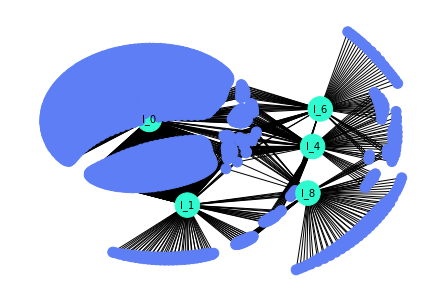

In [55]:
# Draw the graph containing only the top 5 languages with neighbours based on degree centrality
languages_subgraph = nx.Graph()
for node in sorted(lang_btc, key=lang_btc.get, reverse=True)[:5]:
    languages_subgraph.add_node(node, color = G.nodes[node]['color'])
    for neighbour in G.neighbors(node):
        if neighbour[0] == "l":
            languages_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        else:
            languages_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        languages_subgraph.add_edge(node, neighbour)

pos = nx.kamada_kawai_layout(languages_subgraph)
node_sizes = [600 if node.startswith('l_') else 100 for node in languages_subgraph.nodes]
nx.draw(languages_subgraph, pos, node_size=node_sizes, node_color=[languages_subgraph.nodes[node]['color'] for node in languages_subgraph.nodes])
labels = {node: node for node in languages_subgraph.nodes if node.startswith('l_')}
nx.draw_networkx_labels(languages_subgraph, pos, labels, font_size=10)
